In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import  files
import io

In [28]:
uploaded = files.upload()
df_pima = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df_pima.head(8)

Saving diabetes.csv to diabetes (1).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


In [29]:
print(df_pima.describe())
X = df_pima.iloc[:, 0:8]
y = df_pima.iloc[:, 8]

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


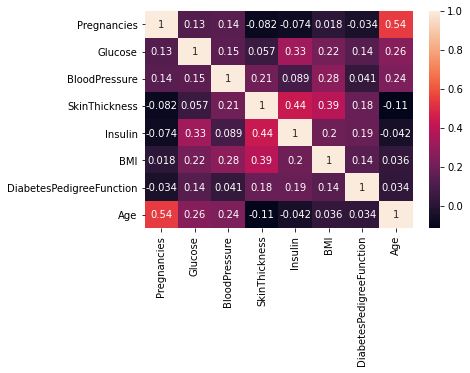

In [30]:
sns.heatmap(X.corr(), annot = True)

In [31]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    X[column] = X[column].replace(0, np.NaN)
    mean = int(X[column].mean(skipna=True))
    X[column] = X[column].replace(np.NaN, mean)

In [32]:
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0            6    148.0           72.0  ...  33.6                     0.627   50

[1 rows x 8 columns]
[  6.  148.   72.   35.  155.   33.6  50. ]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0            6    148.0           72.0           35.0    155.0  33.6   50
1            1     85.0           66.0           29.0    155.0  26.6   31
2            8    183.0           64.0           29.0    155.0  23.3   32
3            1     89.0           66.0           23.0     94.0  28.1   21
4            0    137.0           40.0           35.0    168.0  43.1   33
[[  6. 148. 155.  50.]
 [  1.  85. 155.  31.]
 [  8. 183. 155.  32.]
 ...
 [  5. 121. 112.  30.]
 [  1. 126. 155.  47.]
 [  1.  93. 155.  23.]]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [34]:
classifier = SVC(random_state=0, kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("F1-score: ",f1_score(y_test, y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recal: ",recall_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.8116883116883117
F1-score:  0.6588235294117647
Precision:  0.7368421052631579
Recal:  0.5957446808510638
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154

